In [58]:
%%capture
import os
import sys
import random
import numpy as np
import pandas as pd
import cv2
from keras.preprocessing.image import img_to_array
try:
    from imutils import paths
except ImportError:
    !pip install imutils
    from imutils import paths
import imutils 
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# ea
train_df = pd.read_csv("train.csv") 
test_df = pd.read_csv("test.csv") 
print(train_df.head(5))

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [60]:
diagnosis = list(train_df.diagnosis.unique())
print(diagnosis)

[2, 4, 1, 0, 3]


0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64


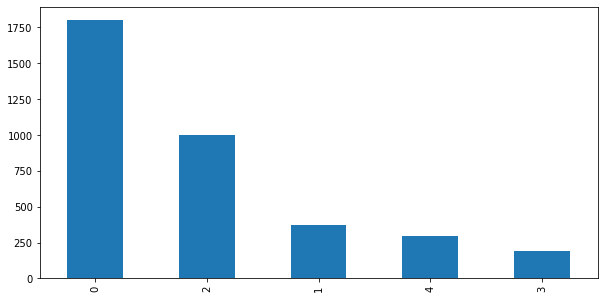

In [62]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
counts = train_df["diagnosis"].value_counts()
print(counts)
counts.plot(kind='bar', ax=ax1)

In [65]:
# get random images from each class and display
columns = 1
classes = {
    "zero": list(train_df.loc[train_df["diagnosis"] == 0].sample(n=columns).id_code),
    "one": list(train_df.loc[train_df["diagnosis"] == 1].sample(n=columns).id_code),
    "two": list(train_df.loc[train_df["diagnosis"] == 2].sample(n=columns).id_code),
    "three": list(train_df.loc[train_df["diagnosis"] == 3].sample(n=columns).id_code),
    "four": list(train_df.loc[train_df["diagnosis"] == 4].sample(n=columns).id_code)
}
"""
zero = train_df.loc[train_df["diagnosis"] == 0].sample(n=columns)
zero.name = "0"
one = train_df.loc[train_df["diagnosis"] == 1].sample(n=columns)
one.name = "1"
two = train_df.loc[train_df["diagnosis"] == 2].sample(n=columns)
two.name = "2"
three = train_df.loc[train_df["diagnosis"] == 3].sample(n=columns)
three.name = "3"
four = train_df.loc[train_df["diagnosis"] == 4].sample(n=columns)
four.name = "4"
"""
print(classes)

{'zero': ['bd375ba756b1'], 'one': ['89d9c071a56f'], 'two': ['ca0f1a17c8e5'], 'three': ['457c7c927e27'], 'four': ['6c250a30593b']}


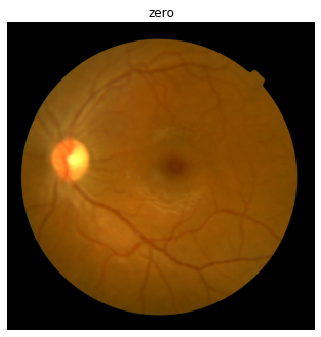

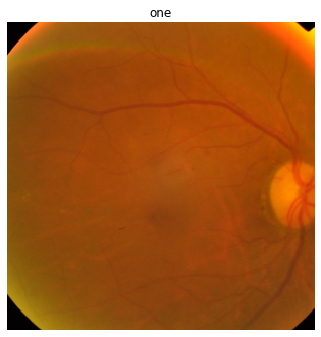

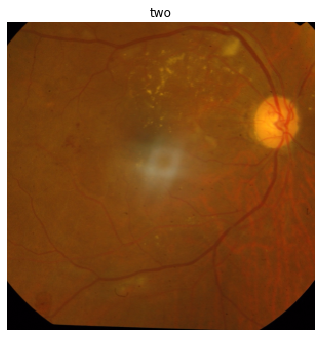

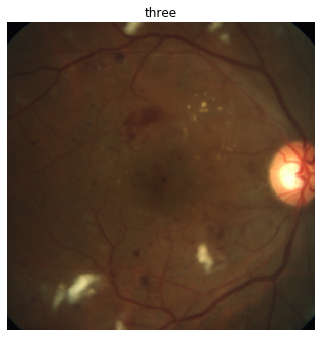

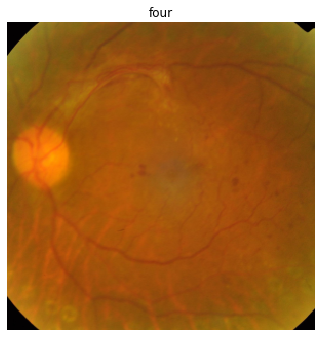

In [91]:
def rescale(image, width, height, aspect_aware, interpolation=cv2.INTER_AREA):
    # if specified to preserve aspect ratio
    if aspect_aware:
        h, w = image.shape[:2]
        dW = 0
        dH = 0
        # if width is smaller than height
        if w < h:
            image = imutils.resize(
                image,
                width=width,
                inter=interpolation
            )
            dH = int((image.shape[0] - height) / 2.0)
        # if height is smaller than width
        else:
            image = imutils.resize(
                image,
                height=height,
                inter=interpolation
            )
            dW = int((image.shape[1] - width) / 2.0)
        h, w = image.shape[:2]
        image = image[dH:h - dH, dW:w - dW]
    # finally return the resized image
    return cv2.resize(image, (width, height), interpolation=interpolation)


def preprocess(image, input_mode="grayscale"):
    img = image
    # convert to uint8 watch out after new definition
    # img = image.astype(np.uint8)
    # if the image is of bgr then equalize each channel and join back
    if input_mode == "bgr":
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        """
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        H, S, V = cv2.split(img)
        _V = cv2.equalizeHist(V)
        img = cv2.merge([H, S, _V])
        img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
        """
    # if grayscale image
    elif input_mode == "grayscale":
        img = cv2.equalizeHist(img)
    img = rescale(img, 300, 300, aspect_aware=True)
    return img

# this method displays images for two classes above and below
def display(classes, columns, cmap=None):
    for _class in classes:
        #print(random_images)
        fig, axes = plt.subplots(nrows=1, ncols=columns, figsize=(5, 5), squeeze=False)
        fig.tight_layout()
        for l in range(1):
            for m, img in enumerate(classes[_class]):
                image = preprocess(cv2.imread("train_images/{}.png".format(img)), input_mode="bgr")
                axes[l][m].imshow(image, cmap=cmap)
                axes[l][m].axis("off")
                axes[l][m].set_title(_class)
    # done displaying
    
# display images
display(classes, columns)

In [115]:
def display(image, cmap=None, title=None):
    fig = plt.figure(figsize=(8, 8))
    #plt.imshow(image)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

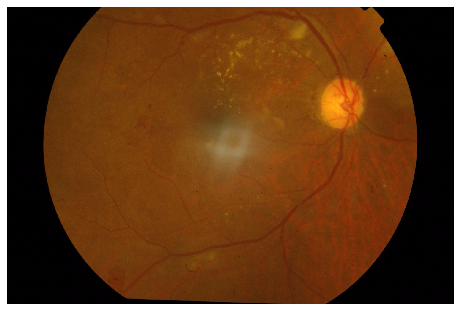

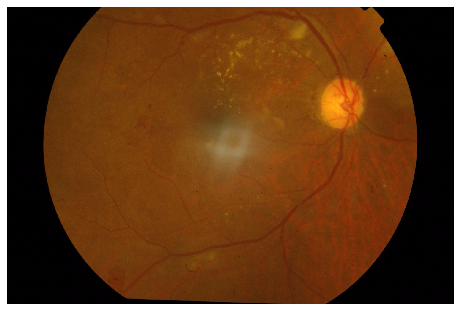

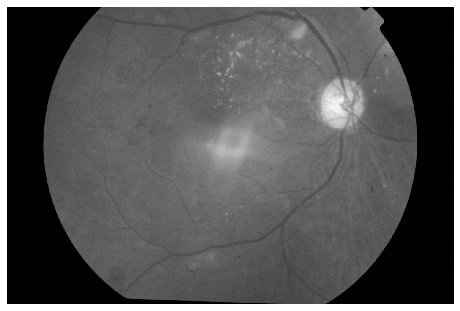

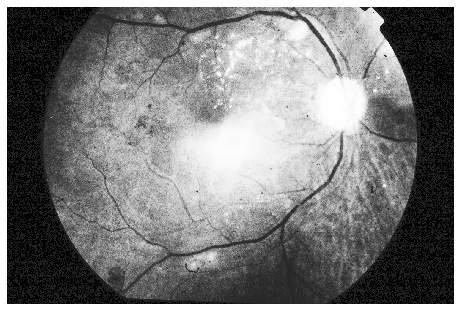

In [156]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    _gamma = 1.0 / gamma
    table = np.array(
        [((i / 255.0) ** _gamma) * 255 for i in np.arange(0, 256)]
    ).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)


img = cv2.imread("train_images/{}.png".format(classes["two"][0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)
g_img = adjust_gamma(image=img, gamma=1.0)
display(g_img)
img = cv2.cvtColor(g_img, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(g_img, cv2.COLOR_RGB2GRAY)
display(gray, cmap="gray")
#gray = cv2.GaussianBlur(gray, (5, 5), 0)
#gray = cv2.equalizeHist(gray)
#display(img, title="HSV")
#H, S, V = cv2.split(img)
#display(R, title="R")
#display(G, title="G")
#display(B, title="B")
_img = cv2.equalizeHist(gray)
#_img = cv2.cvtColor(cv2.merge([H, S, _V]), cv2.COLOR_HSV2RGB)
display(_img, cmap="gray")
#display(V)

In [72]:
classes["two"]

['ca0f1a17c8e5']